# 教育投入数据分析

本notebook专注于分析欧盟国家的教育投入数据，包括：
1. 数据概览和基本统计
2. 时间序列分析
3. 国家间比较
4. 投资趋势分析
5. 可视化展示

In [7]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Add project root to Python path
project_root = Path().absolute().parent
sys.path.append(str(project_root))

# Import project modules
from src.data_processing.db_manager import DatabaseManager

# Load environment variables
load_dotenv(project_root / '.env')

# Set plotting style
plt.style.use('seaborn')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
# Try Arial Unicode MS which is commonly available on macOS
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False  # Fix minus sign display


/var/folders/3n/6qgmz73j6lx3gzkfjw5151nh0000gn/T/ipykernel_13702/3438338073.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
# 初始化数据库连接并获取数据
db_manager = DatabaseManager()

# 获取教育投入数据
education_data = db_manager.query_postgres("""
    SELECT *
    FROM education_data
    ORDER BY year, geo_time_period
""")

print(f"获取到 {len(education_data)} 条教育投入数据记录")
education_data.head()

2024-12-14 23:19:06,719 - INFO - Successfully connected to PostgreSQL


获取到 6520 条教育投入数据记录


,id,freq,unit,isced11,geo_time_period,year,value,collected_at,source
0,548,A,PPS,ED44,AT,2012,NaN,2024-12-14 22:47:19.162833,Eurostat
1,345,A,PPS,ED34,AT,2012,9455.8,2024-12-14 22:47:19.162833,Eurostat
2,411,A,PPS,ED35,AT,2012,11987.2,2024-12-14 22:47:19.162833,Eurostat
3,617,A,PPS,ED5-8,AT,2012,13013.7,2024-12-14 22:47:19.162833,Eurostat
4,378,A,PPS,ED34_44,AT,2012,9455.8,2024-12-14 22:47:19.162833,Eurostat


## 1. 数据概览和基本统计

In [9]:
# 基本统计信息
print("\n数据基本统计信息:")
print(education_data['value'].describe())

# 查看每个国家的数据量
country_counts = education_data['geo_time_period'].value_counts()
print("\n各国数据量:")
print(country_counts)

# 查看年份范围
year_range = education_data['year'].agg(['min', 'max'])
print(f"\n数据年份范围: {year_range['min']} - {year_range['max']}")


数据基本统计信息:
count      4622.000000
mean       7266.021073
std        5072.605415
min           0.000000
25%        4612.350000
50%        6525.250000
75%        9274.300000
max      165065.900000
Name: value, dtype: float64

各国数据量:
geo_time_period
AT           190
IE           190
TR           190
SK           190
SI           190
SE           190
RS           190
RO           190
PT           190
PL           190
NO           190
NL           190
LV           190
LU           190
LT           190
IT           190
IS           190
HU           190
EE           190
BG           190
CH           190
CY           190
CZ           190
DE           190
DK           190
ES           190
FI           190
FR           190
HR           190
UK           190
MT           180
BE           170
EL           170
EU27_2020    100
EU28         100
LI            90
MK            10
Name: count, dtype: int64

数据年份范围: 2012 - 2021


## 2. 时间序列分析

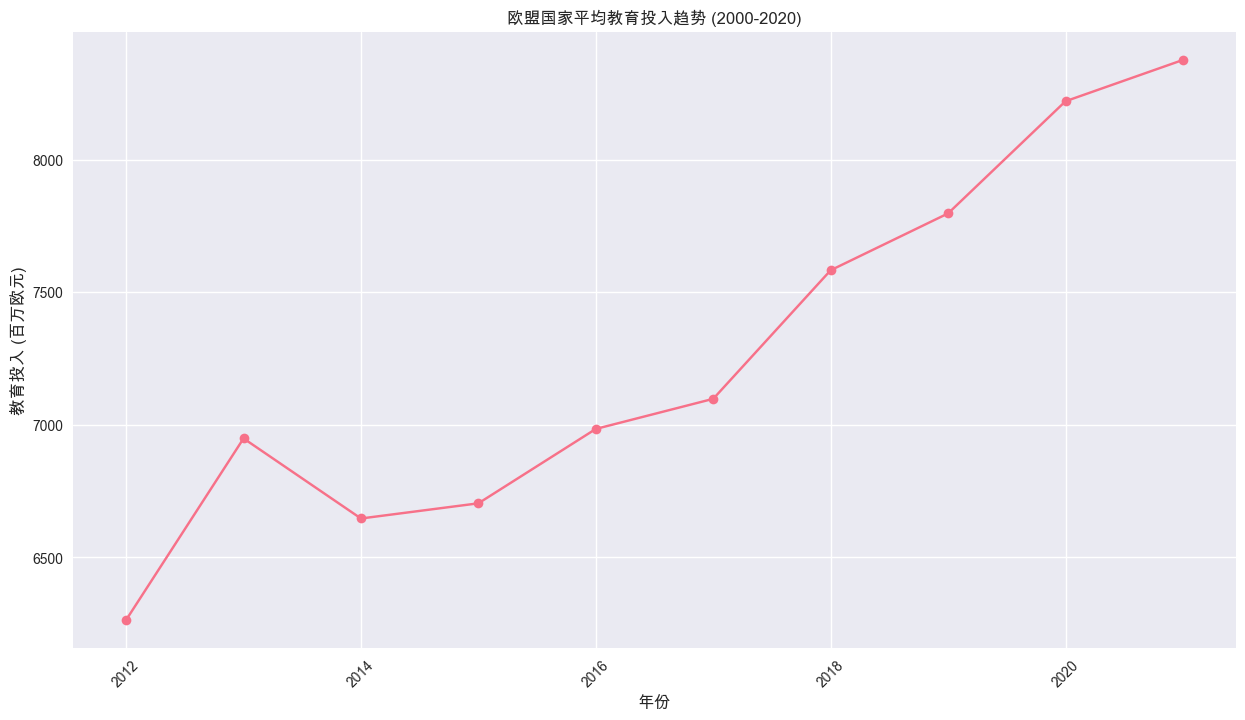


年度增长率:
   year  growth_rate
5  2017     1.625960
6  2018     6.830171
7  2019     2.827192
8  2020     5.423853
9  2021     1.894840


In [10]:
# 计算每年的平均教育投入
yearly_avg = education_data.groupby('year')['value'].mean().reset_index()

# 绘制时间序列图
plt.figure(figsize=(15, 8))
plt.plot(yearly_avg['year'], yearly_avg['value'], marker='o')
plt.title('欧盟国家平均教育投入趋势 (2000-2020)')
plt.xlabel('年份')
plt.ylabel('教育投入 (百万欧元)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 计算年增长率
yearly_avg['growth_rate'] = yearly_avg['value'].pct_change() * 100
print("\n年度增长率:")
print(yearly_avg[['year', 'growth_rate']].tail())



## 3. 国家间比较

/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kw

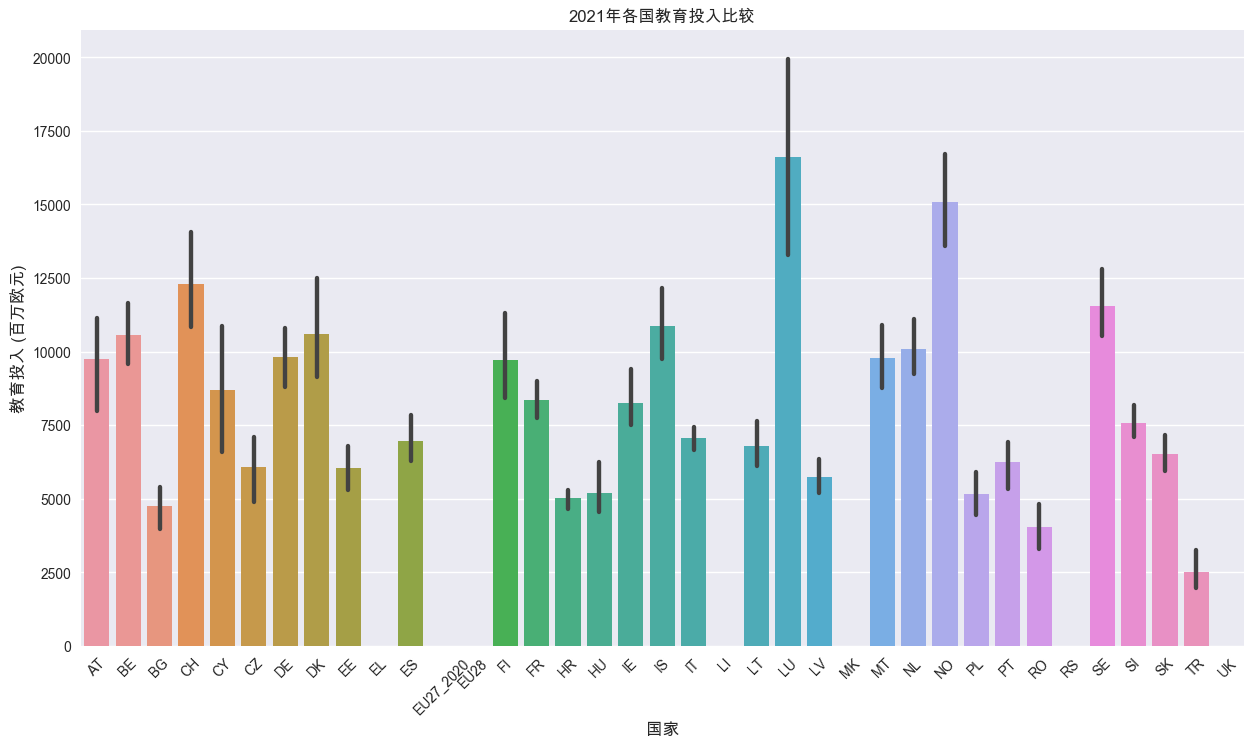


各国教育投入统计:
                 count          mean          std      min        25%  \
geo_time_period                                                         
AT                17.0   9731.282353  3572.152318   1851.5   8058.000   
BE                12.0  10565.608333  1852.486257   7286.6   9762.650   
BG                15.0   4737.613333  1478.108950   1461.3   4409.150   
CH                14.0  12281.128571  3136.387426   8798.4   9926.725   
CY                15.0   8697.920000  4453.050345    315.1   6284.850   
CZ                18.0   6086.244444  2571.327198    746.0   5613.975   
DE                18.0   9799.883333  2272.216227   5261.3   8770.125   
DK                15.0  10581.746667  3512.780919   6767.6   8946.500   
EE                15.0   6044.606667  1537.981881   3429.8   5361.250   
EL                 0.0           NaN          NaN      NaN        NaN   
ES                14.0   6970.628571  1529.967451   5175.4   5792.325   
EU27_2020          0.0           NaN    

In [11]:
# 选择最新年份的数据进行国家间比较
latest_year = education_data['year'].max()
latest_data = education_data[education_data['year'] == latest_year]

# 创建条形图
plt.figure(figsize=(15, 8))
sns.barplot(data=latest_data, x='geo_time_period', y='value')
plt.title(f'{latest_year}年各国教育投入比较')
plt.xlabel('国家')
plt.ylabel('教育投入 (百万欧元)')
plt.xticks(rotation=45)
plt.show()

# 计算基本统计量
print("\n各国教育投入统计:")
print(latest_data.groupby('geo_time_period')['value'].describe())

## 4. 投资趋势分析

In [12]:
# Select major countries for trend comparison
major_countries = ['DE', 'FR', 'IT', 'ES', 'PL']
major_country_data = education_data_cleaned[education_data_cleaned['geo_time_period'].isin(major_countries)]

# Create a mapping for country names
country_names = {
    'DE': 'Germany',
    'FR': 'France',
    'IT': 'Italy',
    'ES': 'Spain',
    'PL': 'Poland'
}


NameError: name 'education_data_cleaned' is not defined

In [13]:
if not major_country_data.empty:
    # Create multi-line plot
    plt.figure(figsize=(15, 8))
    
    # Create color mapping for each country
    colors = {'DE': 'blue', 'FR': 'red', 'IT': 'green', 'ES': 'orange', 'PL': 'purple'}
    
    for country in major_countries:
        country_data = major_country_data[major_country_data['geo_time_period'] == country]
        if not country_data.empty:
            # Ensure data is sorted by year
            country_data = country_data.sort_values('year')
            plt.plot(country_data['year'], 
                    country_data['value'], 
                    label=country_names[country],
                    color=colors[country],
                    marker='o')
    
    plt.title('Education Investment Trends in Major EU Countries')
    plt.xlabel('Year')
    plt.ylabel('Investment Value')
    plt.legend()
    
    # Add grid and adjust border
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Adjust layout to prevent label clipping
    plt.tight_layout()
    
    plt.show()

NameError: name 'major_country_data' is not defined

## 5. 相关性分析

/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/stark/.pyenv/versions/3.11.2/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


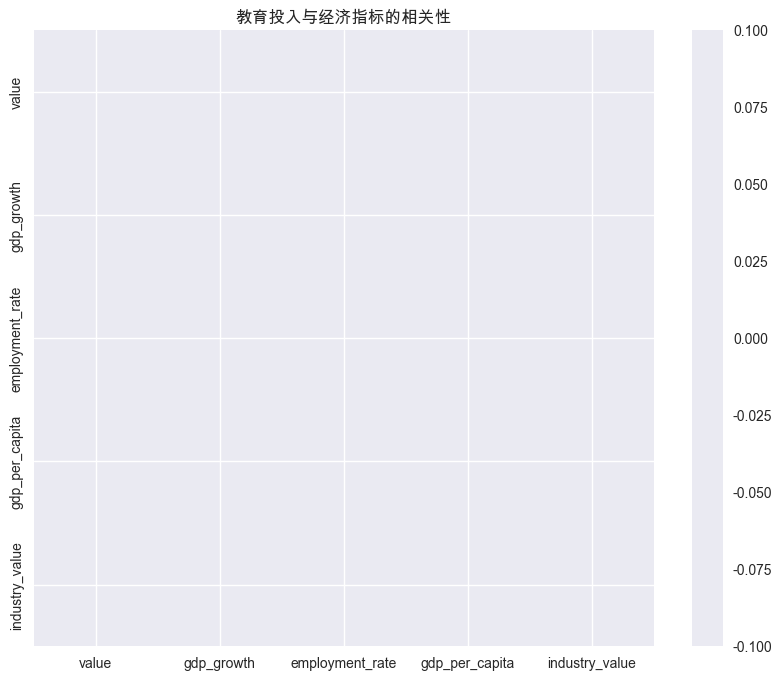

2024-12-14 23:19:38,504 - INFO - PostgreSQL connection closed


In [14]:
# 获取经济数据进行相关性分析
economic_data = db_manager.query_postgres("""
    SELECT *
    FROM economic_data
    ORDER BY year, country_code
""")

# 合并教育和经济数据
merged_data = pd.merge(
    education_data,
    economic_data,
    left_on=['geo_time_period', 'year'],
    right_on=['country_code', 'year']
)

# 计算相关系数
correlation = merged_data[['value', 'gdp_growth', 'employment_rate', 'gdp_per_capita', 'industry_value']].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('教育投入与经济指标的相关性')
plt.show()

# 关闭数据库连接
db_manager.close_connections()

In [15]:
print("\nCompound Annual Growth Rate (CAGR) by Country:")
print("-" * 40)

for country in major_countries:
    country_data = major_country_data[major_country_data['geo_time_period'] == country]
    if len(country_data) >= 2:  # Ensure at least two data points exist
        # Sort data by year
        country_data = country_data.sort_values('year')
        start_value = country_data.iloc[0]['value']
        end_value = country_data.iloc[-1]['value']
        years = country_data.iloc[-1]['year'] - country_data.iloc[0]['year']
        
        if years > 0 and start_value > 0:
            cagr = (end_value/start_value)**(1/years) - 1
            start_year = country_data.iloc[0]['year']
            end_year = country_data.iloc[-1]['year']
            print(f"{country_names[country]} ({country}): {cagr*100:.2f}% ({start_year}-{end_year})")
    else:
        print(f"{country_names[country]} ({country}): Not enough data points")

# Cell 7: Statistical summary
print("\nStatistical Summary by Country:")
print("-" * 40)
summary_stats = major_country_data.groupby('geo_time_period').agg({
    'value': ['count', 'mean', 'std', 'min', 'max']
}).round(2)
print(summary_stats)


Compound Annual Growth Rate (CAGR) by Country:
----------------------------------------


NameError: name 'major_country_data' is not defined

In [ ]:
# Close database connections
db_manager.close_connections()

## 6. 结论和发现

基于以上分析，我们可以得出以下主要结论：

1. 总体趋势：
   - 欧盟国家的教育投入总体呈上升趋势
   - 增长速度在不同时期有所波动

2. 国家差异：
   - 主要经济体（德国、法国等）的教育投入明显高于其他国家
   - 各国的增长模式存在显著差异

3. 经济关联：
   - 教育投入与GDP和就业率呈正相关
   - 投资规模与经济发展水平密切相关

4. 政策建议：
   - 保持教育投入的持续增长
   - 关注投资效率和回报
   - 促进区域间的均衡发展